# 1.3 python_by_example

**PI=Potential Improvement**

**GM=Grammar Mistake**

1. Good references for first(**PI: -**)time programmers include:
   - The first 5 or 6 chapters of [How to Think Like a Computer Scientist](http://greenteapress.com/thinkpython2/html/index.html)
   - [Automate the Boring Stuff with Python](https://automatetheboringstuff.com/)
   - The start of [Dive into Python 3](http://www.diveintopython3.net/).

# 1 Overview

Aim: introduction of basic Python syntax and data structures.

# 2 The task: plotting a white noise process
1. Task: Simulate and plot the white noise process 
$$\varepsilon_0, \varepsilon_1, \dots, \varepsilon_{T}$$
where each draw $\varepsilon_t$ is independent standard normal.
2. There are many ways to achieve this.

# 3 Version 1
Let's break this program down and see how it works.

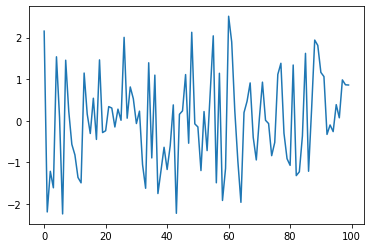

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x= np.random.randn(100)
plt.plot(x)
plt.show()

## 3.1 Import statements
1. The first two lines of the program import functiionality.
   - The first line imports [NumPy](https://python.quantecon.org/numpy.html), suitable for tasks
     - working with arrays (vectors and matrices)
     - common mathematical functions like `cos` and `sqrt`.
     - generating random numbers
     - linear algebra, etc.
   - After `importing numpy as np`, we have access to these attributes via the syntax `np.<function_name>` for convenience.

In [2]:
import numpy as np
np.sqrt(9)

3.0

### 3.1.1 Why all the imports = why we need these functionalities?
1. Because the core language of Python is quite small(**PI:,**) 
   - so it is easy to learn and maintain.
   - we almost always need to import additional functionality, if we want to do something interesting with Python.
     - No exception for scientific work in Python.

### 3.1.2 Packages
1. NumPy is a Python package, used by developers to organize a code library.
   - A package is a directory containing:
     - files with Python code - called **modules** in Python.
     - possibly some compiled code that can be accessed by Python.
       - e.g., functions compiled from C or FORTRAN code.
     - a file called `__init__.py` that specifies what will be executed when we type `import package_name`.

### 3.1.3 Subpackages
1. Consider `x = np.random.randn(100)`.
   - `np` refers to the package NumPy.
   - `random` is a subpackage of NumPy.
     - Subpackages are just packages that are subdirectories of another package.

## 3.2 Importing names directly
1. We can directly type the function name of a module, after we import it.
   - Advantage: Less typing.
   - Disadvantage: In a long program, importing line and exercuting line might be separated by many other lines, so it is harder for readers (even ourselves) to know where `sqrt` came from.


# 4 Alternative versions

1. Aim: to illustrate some more Python syntax and semantics
   - Basic syntax
     - Such as loops.
   - Common data types
     - Such as lists.
   

## 4.1 Version 2 with a For loop (**PI1: labels in code are unclear.**)
1. Lines in part 1 `import` functionality. (**PI2: no these lines, which should be added.**)
2. Part 2:
   - The 1st line sets the desired length of the time series.
   - The 2nd line creates an empty **list**, called $\epsilon$_values
     - This empty list will store the $\epsilon_t$ values as we generate them.
3. Part 3: `for` loop
   - Draw a new random number $\varepsilon_t$ and 
   - Append it to the end of the list $\epsilon$_values and
   - Repeated the above substeps `ts_length` times.
4. Part 4:
   - Generate the plot
   - Display it to the user.

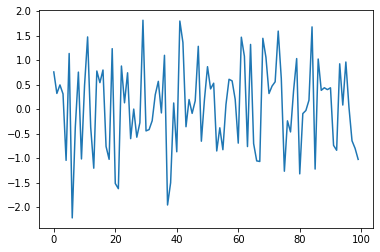

In [2]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 2
ts_length = 100
ϵ_values = [] # Empty list

# Part 3
for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)
    
# Part 4
plt.plot(ϵ_values)
plt.show()

### 4.1.1 Lists-Part 2: python objects and their methods

1. Consider the statement ``ϵ_values = []``, which creates an empty list.
   - **Lists** are a **native Python data structure** used to group a collection of objects.
   - e.g. the following `x`'s
     - 1st element is an integer,
     - 2nd element is a string(**PI:,**)
     - 3rd element is a Boolean value.
     
2. We can use `list_name.append(some_value)` to add some values to a list.
   - `append()` is called a **method**
     - A method is a function "attached to" an object, e.g., in this case, the list `x`.
   - We will learn all about method (**which section**)
     - Python objects, such as lists, strings, etc., all have methods that are used to manipulate the data contained in the object.
       - String objects have [string methods](https://docs.python.org/3/library/stdtypes.html#string-methods).
       - List objects have [list methods](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists), etc.
3. We can use `list_name.pop()` to delete some value of a list.
4. The full set of **list methods** can be found [here](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).
   - 10 methods here;
5. Following C, C++, Java, etc., lists in Python are zero-based.
   - i.e., the number of elements in a list starts with $0$.

In [129]:
x = [10, 'foo', False] # We can include heterogeneous data inside a list
type(x)

list

In [130]:
x

[10, 'foo', False]

In [131]:
x.append(5)
x

[10, 'foo', False, 5]

In [132]:
x.pop()

5

In [133]:
x

[10, 'foo', False]

In [134]:
x[0]

10

### 4.1.2 The For loop-Part 3
1. In part 3, Python executes the two indented lines `ts_length` times before moving on next.
   - These two lines are called a `code block`, since they comprise the "block" of code that we are looping over.
     - Note: Python knows the extent of the code block **only from indentation**.
       - This is also one thing Python is different from other languages.
   - In our program, indention decreases after `ϵ_values.append(e)`. 
      - This tells Python that this line marks the lower limit of the code block.
      - We will discuss indentation later.
2. The following example clarifies how the `for` loop works

In [135]:
animals = ['dog', 'cat', 'bird']
# how Python knows elements in animals are animals, 
# can we use other variable to represent 'animal'? Yes, actually we can use any
for animal in animals:   
    print("The plural of " + animal + " is " + animal + "s")

The plural of dog is dogs
The plural of cat is cats
The plural of bird is birds


3. When we execute a loop of the form, the Python interpreter performs that for each element of the `sequence`, it 
   - "binds" the name `variable_name` to that element and then
   - executes the code block.

Note that `sequence` object can be a very general object.

In [ ]:
for variable_name in sequence:
    <code block>

### 4.1.3 Code blocks and indentation
1. In Python, **all code blocks** are delimited by indentation.
   - Those code blocks includes but not limited to 
     - those occurring inside loops, 
     - if clauses, 
     - functiion definitions, etc.
   - Whitespaces in Python code affects the output of the program.
     - This is a difference between Python and other languages.
   - Advantages of meaningful whitespace:
     - It forces clean, consistent indentation, improving readability.
     - It removes clutter,
       - such as the brackets or end statements used in other languages.
2. Note that
   - The line before the start of a code block always ends in a **colon** (":")
     - `for i in range(10):`
     - `if x > y:`
     - `while x < 100:`
     - etc., etc.
   - All lines in a code block **must have the same amount of indentation**.
   - The Python standard is **4 spaces**.
   
#### 4.1.3.1 Tabs vs Spaces
1. The mixing of tabs and spaces often leads to errors.
   - Note that within text files, the internal representation of tabs and spaces is not the same.
   - If it is configured correctly, then we can use `Tab` key to insert 4 spaces.
      - Jupyter notebook enables this configuration (**PI: a ',' between 'notebook' and 'you'**).
      - Good text editors (**e.g.?**) allow us to configure the Tab key to insert spaces instead of tabs (**PI: 'try' instead of 'trying'; how to configure**). 

## 4.2 Version 3: While loops
1. The `for` loop is the most common technique for iteration in Python, but we can modify the program by a `while` loop for illustration purpose.
2. Note that
   - the code block for the `while` loop is also delimited only by indentation.
   - the statement `i = i + 1` can be replaced by `i += 1`.

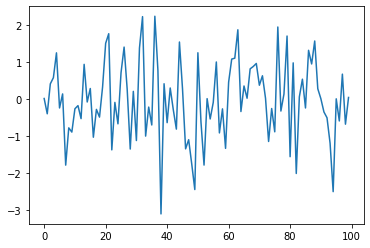

In [137]:
ts_length = 100
ϵ_values = []
i = 0
while i < ts_length:
    e = np.random.randn()
    ϵ_values.append(e)
    i = i + 1

plt.plot(ϵ_values)
plt.show()

## 4.3 Version 4: User-defined functions with `for` loop
1. Restructure the program with the `for` loop to make the logic clearer.
   - To break the program into two parts:
     - A **user-defined function** that generates a list of random variables.
     - The main part of the program that
       - calls this function to get data.
       - plots the data.
2. Let's go over this program carefully:
   - We defined a function called `generate_data()`:
     - `def` is a **Python keyword** used to start function definitions.
     - `def generate_data(n):` indicates that the function is called `generate_data` and that it has a single argument `n`.
     - The indented code is a code block, called the **function body**.
       - In this case, it creates an IID list of random draws using the same logic as before.
     - The `return` keyword indicates that $\epsilon$_values is the object that should be returned to the calling code.
   - The whole function definition is read by the Python interpreter and stored in memory.
   - When the interpreter gets to the expression `generate_data(100)`, it executes the function body with `n` set equal to 100.
   - The net result is that the name `data` is bound to the list $\epsilon$_values returned by the function.

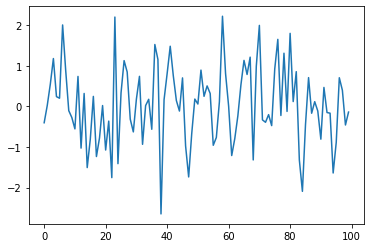

In [138]:
# A user-defined function

def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

# Main part 

data = generate_data(100)
plt.plot(data)
plt.show()

## 4.4 Version 5: user-defined function with `for` loop and if/else-condition
1. We can modify the function `generate_data()` by giving it the ability to return either standard normals or uniform random variables on $(0,1)$ as required.
   - This is achieved (**PI: in**) the next piece of code.
   - The syntax of the if/else clause is self-explanatory, with indentation again delimiting the extent of the code blocks.
2. Note
   - We are passing the argument `U` as a **string**, which is why we write it as `'U'`.
   - Equality is tested with the `==` syntax, not `=`.
     - Comparison vs Assignment (**PI3: clarify comparison and assignment or say we will discuss it in future lecture(which one?)**)
       - `==` used to compare two values.
       - `=` used to assign values.
     - e.g., the statement `a = 10` assigns the name `a` to the value `10`.
     - The expression `a == 10` evaluates to either `True` or `False`, depending on the value of `a`.

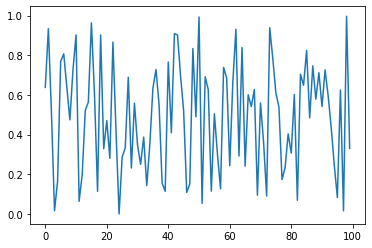

In [139]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0,1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

### 4.4.1 Version 6: user-defined function with `for` loop and function passing as an `argument`
1. There are several ways that we can simplify the code above, and one way is that we can get rid of the conditionals all together by just passing the desired generators type as a function.
2. Now, when we call the function `generate_data()`, we can pass `np.random.uniform` or `np.random.randn` as the second argument.
   - The second object is a function.
   - When the function call `generate_data(100, np.random.randn)` is executed, Python runs the function code block with `n` equal to 100 and the name `generator_type` "bound" to the function `np.random.randn`.
3. Note that while these lines are executed, the names `generator_type` and `np.random.randn` are "synonyms", and can be used in identical ways. 
   - This principle works more generally.
     - e.g., see next codes, we can create another name for the built-in function `max()`, which could then be used in identical ways.
   - In the context of our program, the ability to bind new names to functions means that there is no problem passing a function as an argument to another function.

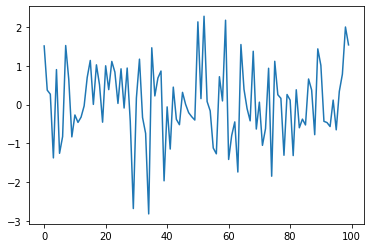

In [140]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.randn)
plt.plot(data)
plt.show()

In [141]:
# max(7,2,4) and m(7,2,4) are equal (PI: emphasize the comparison between these two functions)
m = max
m(7,2,4)
print(max(7,2,4), m(7,2,4))

7 7


## 4.5 List comprehensions
1. We can also simplify the code for generating the list of random draws considerably by using **list comprehension**. (**PI4: maybe a [link](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists) to future lectures or more clarifications about list comprehensions are required here.**)
   - List comprehensions are an elegant Python tool for creating lists.
     - Common applications are 
       - to make new lists where each element is the result of some operations applied to each member of another sequence or iterable, or
       - to create a subsequence of those elements that satisfy a certain condition.
     - Another elegant way to create lists is to use `lambda` function. (**PI5: maybe attach a link to latter lecture (lecture 1.4)**)
   - Syntax: `[expression for item in list]`
     - A list comparison consists of brackets containing an expression followed by a `for` clause, then zero or more `for` or `if` clauses.
     - The result will be a new list resulting from evaluating the expression in the context of the `for` and `if` clauses which follow it.
   - Nested list comprehensions
     - The initial expression in a list comprehension can be any arbitrary expression, including another list comprehension.

In [142]:
animals = ['dog', 'cat', 'bird']
plurals = [animal + 's' for animal in animals] # List comprehension
plurals

['dogs', 'cats', 'birds']

In [143]:
# Example

doubles = [2 * x for x in range(8)]
doubles
print(range(8), doubles)

range(0, 8) [0, 2, 4, 6, 8, 10, 12, 14]


In [ ]:
# With the list comprehension syntax, we can simplify the lines

ϵ_values = []
for i in range(n):
    e = generator_type()
    ϵ_values.append(e)

# into

ϵ_values = [generator_type() for i in range(n)]

# 5 My answers to exercises and solutions

## 5.1 Exercise 1

1. $n!$ is read as "n factorial" and defined as $n!= n \times (n-1) \times \cdots \times 2 \times 1$.
2. Task: write a function `factorial` such that `factorial(n)` returns $n!$.

In [147]:
def factorial(n):
    x = 1
    i = 1
    while i <= n: # This can be rewritten by using `for` loop
        x = x * i
        i += 1
    return x

In [148]:
factorial(4)

24

## 5.2 Exercise 2
1. The binomial random variable $Y \sim Bin (n, p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$.
2. Task: without any import besides `from numpy.random import uniform`, write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$.
3. Hint: if $U$ is uniform on $(0,1)$ and $p \in (0,1)$, then the expression $U < p$ evaluates to `True` with probability $p$.


In [153]:
from numpy.random import uniform

def binomial_rv(n, p):
    i = 0
    x = 0
    while i <= n:        
        e = np.random.uniform(0,1)
        i += 1
        if e < p:
            x = x+1
        else:       # The `else` part can be deleted.
            x = x
    return x

In [155]:
binomial_rv(10,0.5)

5

## 5.3 Exercise 3
1. Task: compute an approximation to $\pi$ using Monte Carlo (**PI6: an introduction (a link) to Monte Carlo Simulation**). Use no imports besides `import numpy as np`.
2. Hints:
   - If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.
   - If $U_1, \dots, U_n$ are IID copies of $U$, then, as $n$ gets larger, the fraction that falls in $B$, converges to the probability of landing in $B$.
   - For a circle, $area=\pi*radius^2$ (**PI7: make notations more consistent**)

3. **Summary of the answer**:
   - (**PI8: a [unit circle](https://en.wikipedia.org/wiki/Unit_circle) is a circle with unit radius; the answer here can be modified a little bit.**)

In [3]:
import numpy as np

length_ts = 100000
i = 0
s_c = 0
while i <= length_ts: # We can replace it with 
    u = [np.random.uniform(0,1) for i in range(2)]
    x, y = u
    a = x**2 + y**2
    if a <= 1:
        s_c += 1
    else:
        s_c += 0
    i += 1

r = 1
s = s_c /length_ts
π = (s * 4) / (r**2)
print(π)

3.14008


In [4]:
def π(length_ts=10000, r=1):
    i = 0
    s_c = 0
    while i <= length_ts: # We can replace it with 
        u = [np.random.uniform(0,1) for i in range(2)]
        x, y = u
        a = x**2 + y**2
        if a <= 1:
            s_c += 1
        else:
            s_c += 0
        i += 1
    s = s_c / length_ts
    return (s * 4) / (r**2)

In [7]:
π()

3.1316

## 5.4 Exercise 4
1. Task: write a program that prints one realization of the following random device:
   - Flip an unbiased coin 10 times.
   - If 3 consecutive (**PI9: if the answer is true, then we should delete consecutive**) heads occur one or more times within this sequence, pay one dollar.
   - If not, pay nothing.
2. Use no import besides `from numpy.random import uniform`

In [159]:
from numpy.random import uniform

# ? The answer says that if 3 heads occur one or more times within this sequence, then pay one dollar.
def random(n, p):
    i = 1
    x_values = [] 
    while i <= n:
        e = np.random.uniform(0,1)
        i += 1
        if e < p:
            x_values.append(0)
        else:
            x_values.append(1)
    return x_values


In [50]:
from numpy.random import uniform

payoff = 0
count = 0

for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0

if count >= 3:
    payoff = 1

print(payoff)

0


In [160]:
random(10, 0.5)

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

## 5.5 Exercise 5

1. Task: Simulate and plot the correlated time series
   $$
   x_{t+1} = \alpha x_t + \varepsilon_{t+1} 
   $$
   - where $x_0 = 0$ and $t = 0, \cdots , T$.
   - the sequence of shocks $\{ \varepsilon_t\}$ is assumed to be IID and standard normal.
2. Restrict import statements to
   - `import numpy as np`
   - `import matplotlib.pyplot as plt`
3. Set $T=200$ and $\alpha = 0.9$

In [4]:
# **PI 9: we can write a user-defined function here.**
import numpy as np
import matplotlib.pyplot as plt

# PI: function
def simulate(α, T):
    x_values = []
    t = 0
    x = 0
    while t <= T:      # The `for` loop can be written here.
        ε = np.random.normal()
        x = α * x + ε
        x_values.append(x)
        t += 1
    return x_values

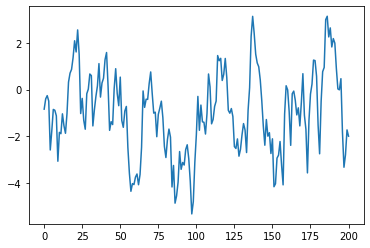

In [5]:
x_values = simulate(0.9, 200)
plt.plot(x_values)
plt.show()

## 5.6 Exercise 6
1. Basic knowledge: Legend plot
2. Task: starting with solution to ex.5, plot three simulated time series, one for each of the case $\alpha = 0$, $\alpha = 0.8$ and $\alpha = 0.98$.
   - Requirements: use a `for` loop to step through the $\alpha$ values.
3. Important hints:
   - If we call the `plot()` function multiple times before calling `show()`, all of the lines we produce will end up on the same figure.
     - If we omit the argument `'b-'` to the plot function, Matplotlib will automatically select different colors for each line.
   - The expression `'foo'+ str(42)` evaluates to `'foo42'`.

In [8]:
x_1 = simulate(0, 200)
x_2 = simulate(0.8, 200)
x_3 = simulate(0.98, 200)


plt.plot(x_1, label=f'$α={0.0}$')
plt.plot(x_2, label=f'$α={0.8}$')
plt.plot(x_3, label=f'$α={0.98$')
plt.legend()
plt.show()

SyntaxError: f-string: expecting '}' (<ipython-input-8-c8e961cb62bb>, line 8)

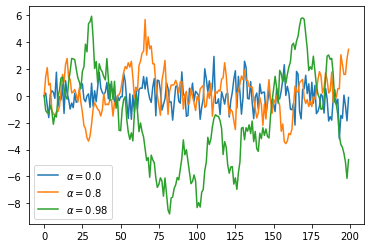

In [17]:
αs = [0.0, 0.8, 0.98]
ts_length = 200

for α in αs:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    plt.plot(x_values, label=f'$α = {α}$')
plt.legend()
plt.show()

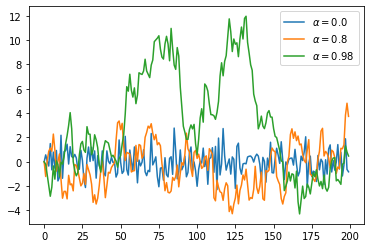

In [19]:
αs = [0.0, 0.8, 0.98]
ts_length = 200

for α in αs:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = α * current_x + np.random.randn()
    plt.plot(x_values, label=f'$\\alpha = {α}$')
plt.legend()
plt.show()